Demo of the Keras (https://keras.io/) library. To run the code, download the T1 images of the IXI dataset (http://brain-development.org/ixi-dataset/) as well as the demographic information and convert it to .csv.

In [8]:
import nibabel as nib
import numpy as np

import os, csv

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline  


data_dir = 'E:/brains/IXI/'
labels_file = 'IXI.csv'

image_size = (256, 256, 150)

In [2]:
def load_data(data_dir, labels_file):
    '''Loading data usually has 2 parts, the inputs (images) and ouptuts (labels)'''    
    
    ids = []
    subjects = {}
    
    ixi_reader = csv.reader(open(data_dir + labels_file))
    lines = list(ixi_reader)[1:200]
    
    for line in lines:
        try:
            ixi_id = int(line[0])
            sex = int(line[1])
            age = float(line[11])
            subjects[ixi_id] = (sex, age)

            ids.append(ixi_id)
        except ValueError as e:
            print('Uh oh:', e)
                
    # Now load the data
    # We're going to load just slices
    print('We have', len(ids), 'subjects with sex/age information.')
    imaging_slices = {}
    for filename in os.listdir(data_dir):
        if '.nii.gz' in filename:
            ixi_id = int(filename[3:6])
            
            if ixi_id in ids:
                print('Loading image', ixi_id)
                image = nib.load(data_dir + filename).get_data()
                image_slice = image[:, :, 75]
                image_slice = np.reshape(image_slice, (256, 256, 1))
                
                imaging_slices[ixi_id] = image_slice
            
    
    good_images = np.empty((len(ids), 256, 256, 1))
    good_labels = np.empty((len(ids), 1))
    
    # order all the data so that the labels array matches the data array
    for i, good_id in enumerate(ids):
        try:
            good_labels[i, 0] = subjects[good_id][0] - 1       
            good_images[i, ...] = imaging_slices[good_id]
        except:
            pass
        
    return good_images, good_labels

In [3]:
images, labels = load_data(data_dir, labels_file)
print('We have', images.shape[0], 'data points')

Uh oh: could not convert string to float: 
Uh oh: could not convert string to float: 
Uh oh: could not convert string to float: 
Uh oh: could not convert string to float: 
Uh oh: could not convert string to float: 
Uh oh: could not convert string to float: 
Uh oh: could not convert string to float: 
Uh oh: could not convert string to float: 
Uh oh: could not convert string to float: 
Uh oh: could not convert string to float: 
Uh oh: could not convert string to float: 
Uh oh: could not convert string to float: 
Uh oh: could not convert string to float: 
Uh oh: could not convert string to float: 
Uh oh: could not convert string to float: 
Uh oh: could not convert string to float: 
Uh oh: could not convert string to float: 
Uh oh: could not convert string to float: 
Uh oh: could not convert string to float: 
Uh oh: could not convert string to float: 
Uh oh: could not convert string to float: 
Uh oh: could not convert string to float: 
Uh oh: could not convert string to float: 
Uh oh: coul

Loading image 446
Loading image 447
Loading image 448
Loading image 449
Loading image 450
Loading image 451
Loading image 452
Loading image 453
Loading image 454
Loading image 455
Loading image 456
Loading image 458
Loading image 459
Loading image 460
Loading image 461
Loading image 462
Loading image 463
Loading image 464
Loading image 465
Loading image 467
Loading image 468
Loading image 469
Loading image 470
Loading image 473
Loading image 474
Loading image 475
Loading image 476
Loading image 477
Loading image 478
Loading image 479
Loading image 480
Loading image 481
Loading image 482
Loading image 483
Loading image 484
Loading image 485
Loading image 486
Loading image 487
Loading image 488
Loading image 489
Loading image 490
Loading image 491
Loading image 492
Loading image 493
Loading image 494
Loading image 495
Loading image 496
Loading image 497
Loading image 498
Loading image 499
Loading image 500
Loading image 501
Loading image 502
Loading image 503
Loading image 504
Loading im

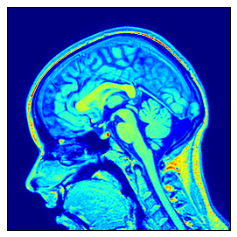

Example label [ 1.]
[[ 0.  1.]]


In [23]:
from keras.utils import to_categorical

random_example_number = np.random.randint(images.shape[0])

example_image = images[random_example_number, :, :, 0]
example_label = labels[random_example_number]

plt.imshow(example_image.T, origin='lower')
plt.xticks([])
plt.yticks([])
plt.show()

print('Example label', example_label)

categorical_example_label = to_categorical([example_label], num_classes=2)
print(categorical_example_label)

In [51]:
import tensorflow as tf
tf.device('cpu')
from keras.models import Sequential

from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D

from keras.optimizers import Adam

from keras import backend as K
K.clear_session()


kernel_size = (3, 3)
n_classes = 2

filters = 8

model = Sequential()

model.add(Conv2D(filters, kernel_size, activation='relu', input_shape=(256, 256, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(filters*2, kernel_size, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters*4, kernel_size, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters*8, kernel_size, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

adam = Adam(lr=0.00002)

model.compile(loss='categorical_crossentropy',
                 optimizer=adam,
                 metrics=['accuracy'])

categorical_labels = to_categorical(labels, num_classes=2)

model.summary()

model.fit(images, categorical_labels, epochs=10, batch_size=32)


K.clear_session()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 8)       80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 254, 254, 8)       32        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 16)      1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 32)        0         
__________

TypeError: 'History' object is not subscriptable

In [ ]:
def mlp():
    model = Sequential()

    model.add(Flatten(input_shape=(256, 256, 1)))
    model.add(Dense(units=256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=n_classes, activation='softmax'))


    adam = Adam(lr=0.0002)

    model.compile(loss='categorical_crossentropy',
                 optimizer=adam,
                 metrics=['accuracy'])

    return model